<a href="https://colab.research.google.com/github/GauraoM/ML-Basics-Definitions/blob/main/Bias_and_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

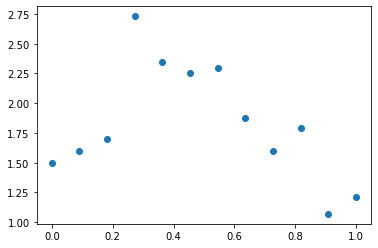

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset
t = np.linspace(0,1,12)
h = np.array([1.5,1.6,1.7,2.731,2.35,2.25,2.3,1.88,1.6,1.79,1.07,1.21])
plt.scatter(t,h)

No handles with labels found to put in legend.


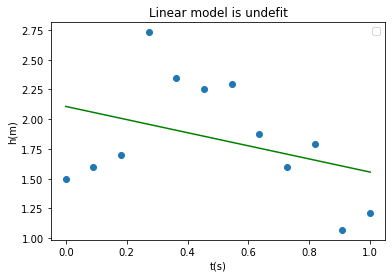

In [ ]:
# Fitting using linear equation degree=1 to show high bias
p1 = np.polyfit(t,h,1) # fit to ploynomial with degree=1
plt.scatter(t,h)
plt.plot(t,np.polyval(p1,t),c='g')
plt.xlabel('t(s)')
plt.ylabel('h(m)')
plt.title("Linear model is undefit")
plt.legend()

No handles with labels found to put in legend.


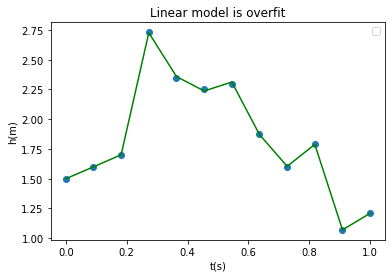

In [ ]:
# Fitting using linear equation degree=1 to show high variance
p1 = np.polyfit(t,h,10) # fit to ploynomial with degree=1
plt.scatter(t,h)
plt.plot(t,np.polyval(p1,t),c='g')
plt.xlabel('t(s)')
plt.ylabel('h(m)')
plt.title("Linear model is overfit")
plt.legend()

No handles with labels found to put in legend.


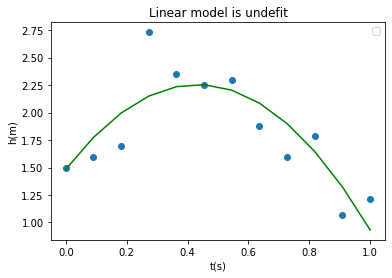

In [ ]:
# Fitting using linear equation degree=1 to show bias-variance tradeoff 
p1 = np.polyfit(t,h,2) # fit to ploynomial with degree=2
plt.scatter(t,h)
plt.plot(t,np.polyval(p1,t),c='g')
plt.xlabel('t(s)')
plt.ylabel('h(m)')
plt.title("Linear model is undefit")
plt.legend()

### Bias-Varience tradeoff using weather History dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
# from mixtend.evaluate import bias_variance_decamp

In [ ]:
# read the file
data = pd.read_csv("/content/weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data['Date'] = pd.to_datetime(data['Formatted Date'], utc=True) # Convert argument to datetime
data['Month'] = data['Date'].dt.month

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,3
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,4


In [ ]:
# Dropping unnecessary column
data = data.drop(["Formatted Date","Daily Summary","Loud Cover","Pressure (millibars)","Date"],axis=1)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Month
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,3
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,3
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,4
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,4
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,4


In [ ]:
# Perform label encoding
label_encoder = preprocessing.LabelEncoder()
data['Summary'] = label_encoder.fit_transform(data['Summary'])
data['Summary'].unique()

data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Month
0,19,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,3
1,19,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,3
2,17,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,4
3,19,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,4
4,17,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,4


In [ ]:
# replace snow and rain with 0,1
data['Precip Type'] = data['Precip Type'].replace(['rain','snow'],[0,1])
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Month
0,19,0.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,3
1,19,0.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,3
2,17,0.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,4
3,19,0.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,4
4,17,0.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,4


In [ ]:
# Checking for null values
data.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Month                         0
dtype: int64

In [ ]:
data["Precip Type"] = data["Precip Type"].fillna(0)

In [ ]:
# Checking for null values
data.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Month                       0
dtype: int64

In [ ]:
# Splitting the data into X and y
y = data["Apparent Temperature (C)"]
data = data.drop('Apparent Temperature (C)', axis=1) 
data.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Month
0,19,0.0,9.472222,0.89,14.1197,251.0,15.8263,3
1,19,0.0,9.355556,0.86,14.2646,259.0,15.8263,3
2,17,0.0,9.377778,0.89,3.9284,204.0,14.9569,4
3,19,0.0,8.288889,0.83,14.1036,269.0,15.8263,4
4,17,0.0,8.755556,0.83,11.0446,259.0,15.8263,4


In [ ]:
y

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 96453, dtype: float64

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

# train the model on Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predicting
pred = model.predict(X_test)

# Finding Variance
variance = np.var(pred)
variance

113.78425583424607

In [ ]:
# Finding Bias
SSE = np.mean((np.mean(pred) - y)**2) # Sum of squared error
Bias = SSE - variance
Bias

0.6376661731321036